# BER repetition code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp
%matplotlib inline
plt.rcParams['figure.dpi'] = 300


def qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

N = np.array([1, 2, 3, 4, 100])
SNR = np.linspace(-15,40,200)
SNR_lin = 10**(SNR/10)
BER_AWGN = np.zeros((len(N), len(SNR)))
BER_RC = np.zeros((len(N), len(SNR)))

In [2]:
## BER for the AWGN
for i in range(len(N)):
    BER_AWGN[i,:] = qfunc(np.sqrt(2 * N[i] * SNR_lin))


## BER for the repetition coding

for i in range(len(N)):
    # adapt integration range depending on how "wide" density is
    x = np.linspace(0,4*N[i],70000)
    for j in range(len(SNR)):
        f = qfunc(np.sqrt(2  * x * SNR_lin[j])) * 1/np.math.factorial(N[i] - 1) * x**(N[i] - 1) * np.exp(-x)
        BER_RC[i,j] = np.trapz(f, x)


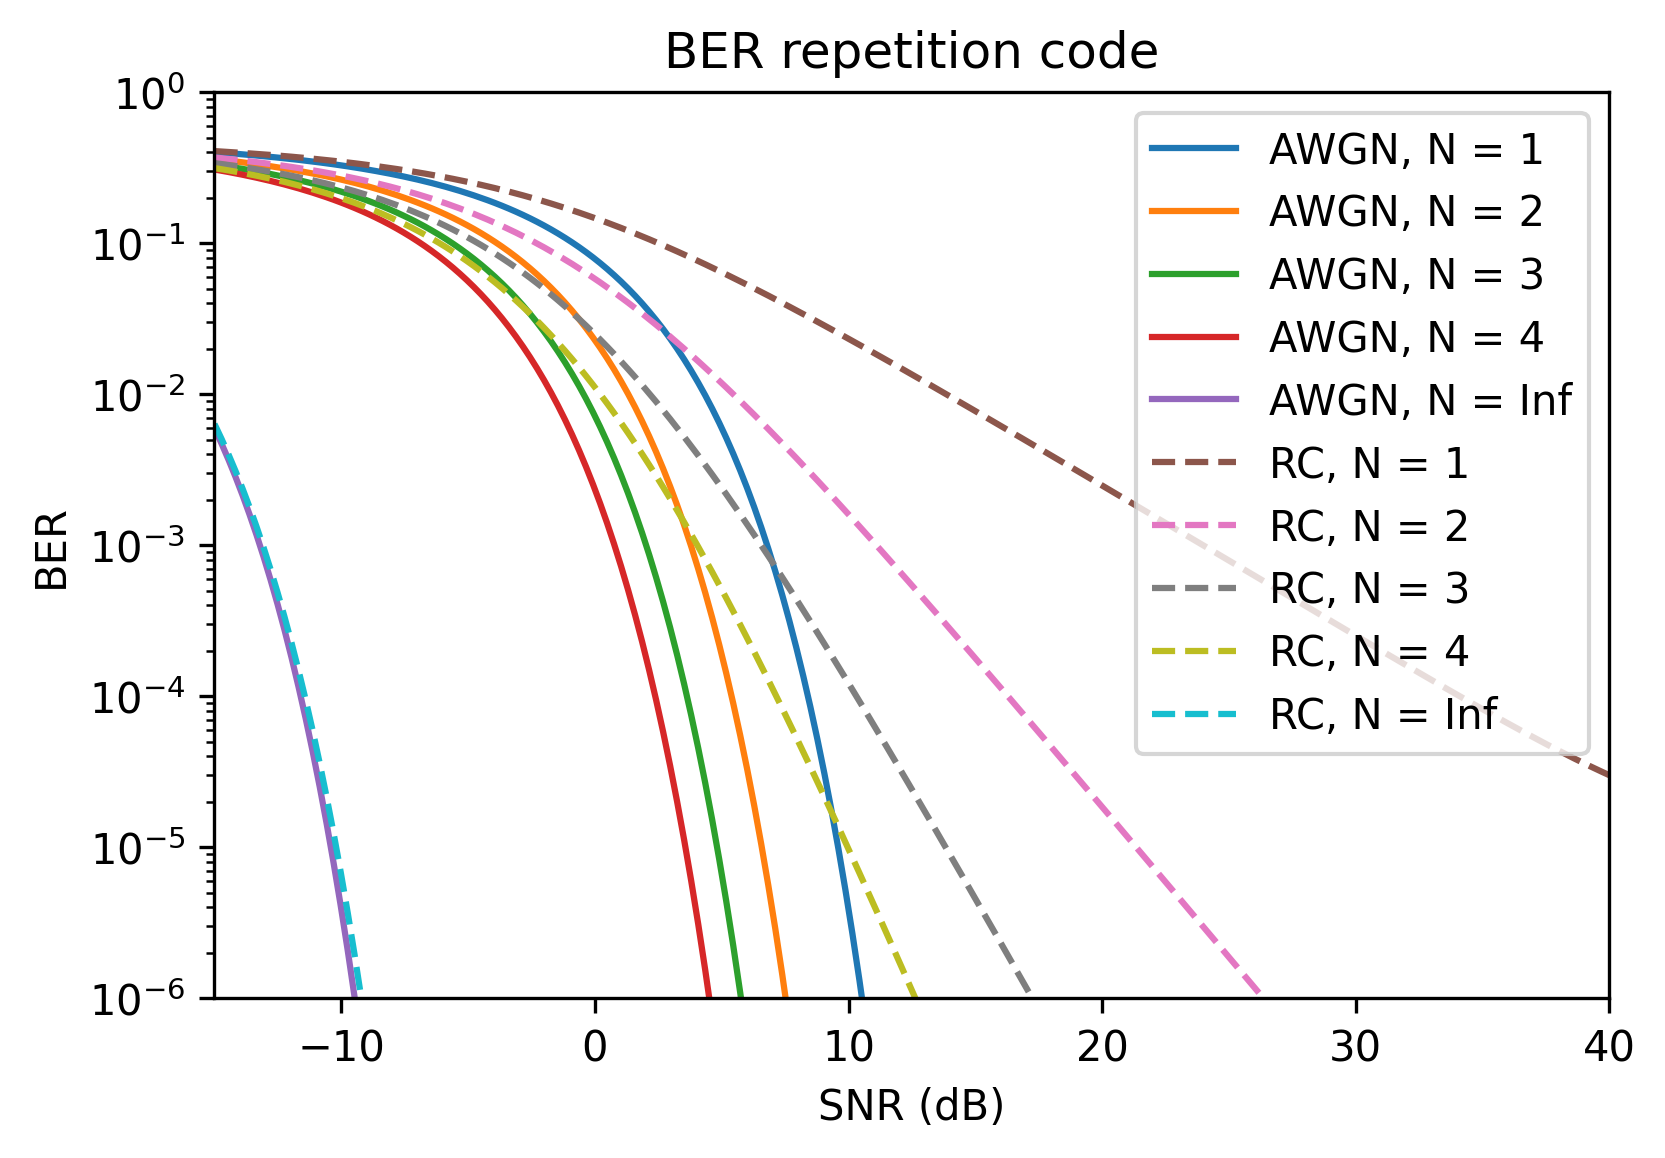

In [3]:
plt.plot(SNR, np.transpose(BER_AWGN))
plt.plot(SNR, np.transpose(BER_RC), '--')
plt.title("BER repetition code")
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.legend(['AWGN, N = 1', 'AWGN, N = 2','AWGN, N = 3','AWGN, N = 4', 'AWGN, N = Inf', 'RC, N = 1', 'RC, N = 2',
'RC, N = 3', 'RC, N = 4', 'RC, N = Inf'])
plt.ylim(1e-6,1)
plt.xlim(np.min(SNR),np.max(SNR))
plt.yscale('log')
plt.savefig("repetition_code.png")
plt.show()